# Hypotézy

1. 
2. Ľuďom nad 50 rokov menej prekáža zlé pokrytie wifi počas letu.
3. Ak je pasažier počas dlhého letu nespokojný s komfortom, tak je nespokojný aj s celým letom.
4. Počas dlhých letov je pasažierom ponúkané lepšie jedlo.
5. Čím dlhšie meškanie odletu, tak tým dlhšie meškanie príletu (hypotéza so spojitými dátami)


In [12]:
import pandas as pd
import seaborn as sns
from scipy.stats import chisquare

In [2]:
df = pd.read_csv('dataset/train.csv', index_col='Unnamed: 0')

# 2. Ľuďom nad 50 rokov menej prekáža zlé pokrytie wifi počas letu.

In [33]:
older_than_fifty = df.loc[(df['Age'] >= 50) & (df['Inflight wifi service'] <= 3), 'satisfaction']
younger_than_fifty = df.loc[(df['Age'] < 50) & (df['Inflight wifi service'] <= 3), 'satisfaction']


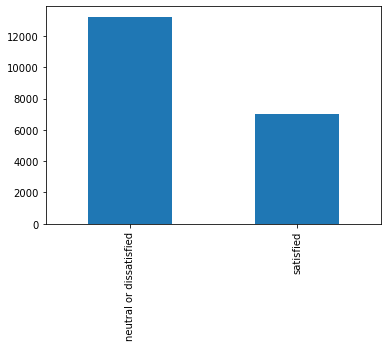

In [36]:
older_than_fifty.value_counts().plot(kind='bar')

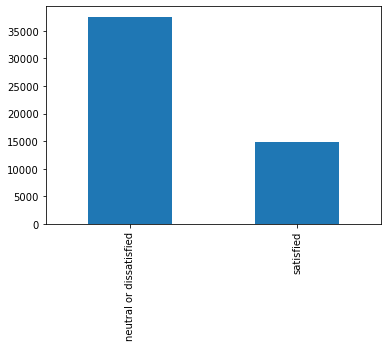

In [37]:
younger_than_fifty.value_counts().plot(kind='bar')

In [46]:
older = older_than_fifty.value_counts().sort_index()

jano = sum(older.values.tolist())
older / jano * 100

neutral or dissatisfied    65.361446
satisfied                  34.638554
Name: satisfaction, dtype: float64

In [47]:
younger = younger_than_fifty.value_counts().sort_index()

jano = sum(younger.values.tolist())
younger / jano * 100

neutral or dissatisfied    71.766974
satisfied                  28.233026
Name: satisfaction, dtype: float64

In [42]:
chisquare(older.values.tolist(), f_exp=younger.values.tolist())

Power_divergenceResult(statistic=19872.3439764954, pvalue=0.0)

# 4 Počas dlhých letov je pasažierom ponúkané lepšie jedlo

In [4]:

long_flights = df.loc[df['Flight Distance'] > 843, 'Food and drink']
short_flights = df.loc[df['Flight Distance'] <= 843, 'Food and drink']

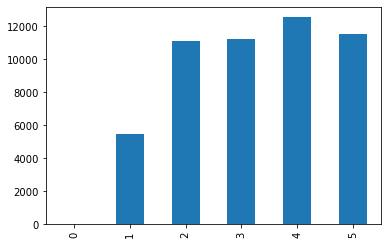

In [6]:
long_flights.value_counts().sort_index().plot(kind='bar')

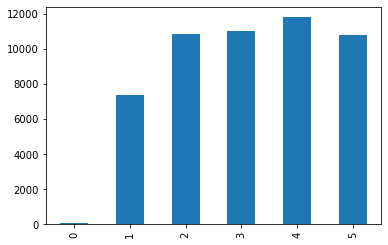

In [7]:
short_flights.value_counts().sort_index().plot(kind='bar')

In [30]:
short = short_flights.value_counts().sort_index()

jano = sum(short.values.tolist())
short / jano * 100

0     0.107742
1    14.202709
2    20.928890
3    21.257888
4    22.729721
5    20.773049
Name: Food and drink, dtype: float64

In [31]:
long_f = long_flights.value_counts().sort_index()

jano = sum(long_f.values.tolist())
long_f / jano * 100

0     0.098213
1    10.504930
2    21.395008
3    21.666538
4    24.158450
5    22.176860
Name: Food and drink, dtype: float64

In [25]:
chisquare(long_f.values.tolist(), f_exp=short.values.tolist())

Power_divergenceResult(statistic=605.2234165579808, pvalue=1.5040015135005838e-128)